In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv("/content/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [18]:
# 2. Data Cleaning
# Handle null values in director, cast, country

# Convert date_added to datetime

print(df.shape)
print(df.info())
print(df.describe())
print(df.dropna)

df['date_added']=pd.to_datetime(df['date_added'],format='mixed')
print(df.head())



(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB
None
                          date_added  release_year
count                           8797   8807.000000
mea

In [35]:
#3. Feature Engineering
# Extract year from date_added

# Count number of shows added per year

# Count number of titles by country

df['year_added']=df['date_added'].dt.year
print(df['year_added'])

df['year_added'].value_counts().sort_index()

class title_01:
  def __init__(self,country):
    self.country=country
    self.df=self.on_going

  def on_going(self):
    country_dt=df[df['country']==self.country]
    return country_dt

  def result_01(self):
    country_df=self.on_going()
    title_number=country_df.shape[0]
    return title_number

  def result(self):
    # result_01=self.result
    # title_number=result_01
    title_number=self.result_01()
    print(f"the answer is : {title_number}")

obj_01=title_01("India")
obj_01.result()

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: year_added, Length: 8807, dtype: float64
the answer is : 972


In [53]:
# 4. Analysis with Pandas & NumPy
# Most common genres (value_counts() on listed_in)

# Average duration of movies (after extracting number from string)

# Number of movies and TV shows over time

df['listed_in'].value_counts()

movie_df=df[df['type']=='Movie'].copy()
movie_df.dropna(inplace=True)

movie_df['duration_min']=movie_df['duration'].str.replace('min','').astype(int)

movie_01=movie_df['duration_min'].mean()
print(movie_01)

movie_02=movie_01<movie_df['duration_min']
print(movie_02.count())




102.70144648023144
5185


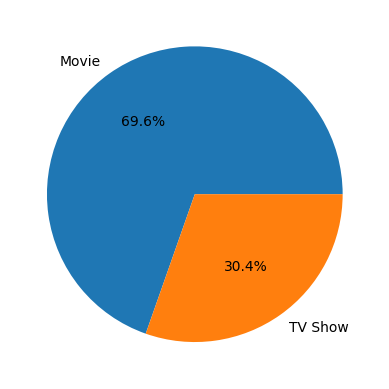

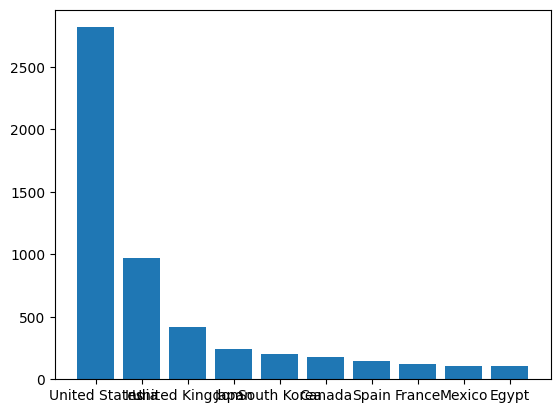

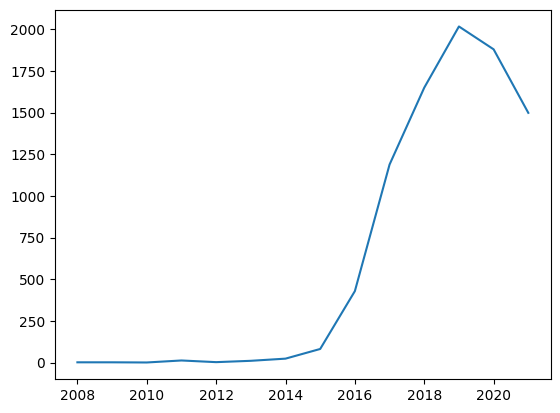

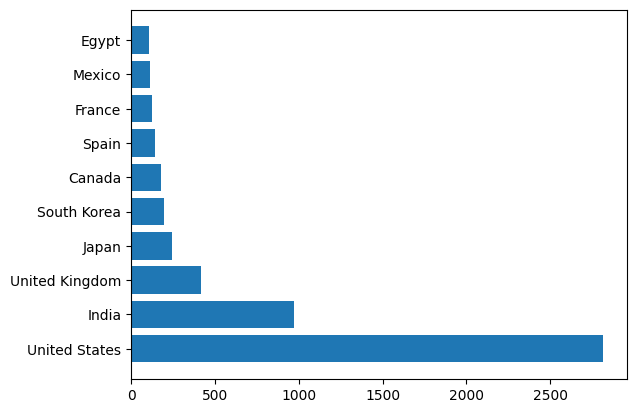

In [70]:
# 5. Visualization (Matplotlib)
# Pie chart: Movies vs TV Shows

# Bar graph: Top 10 countries by content count

# Line plot: Number of titles added per year

# Horizontal bar chart: Top 10 genres

# Word cloud (optional with WordCloud library) for actors or genres


type_counts=df['type'].value_counts().sort_index()


plt.pie(type_counts.values,labels=type_counts.index,autopct='%1.1f%%')
plt.show()


top_countries=df['country'].value_counts().head(10)
plt.bar(top_countries.index,top_countries.values)
plt.show()

year_counts=df['year_added'].value_counts().sort_index()
plt.plot(year_counts.index,year_counts.values)
plt.show()

plt.barh(top_countries.index,top_countries.values)
plt.show()